## Using the Python API to fetch data from external APIs.
Libraries used here are 
    - `urllib.request` library to perform http requests from these API endpoints,
    - `json` library to parse the response data to a more universally known JSON format
    - `matplotlib.pyplot` and `prettytable` to be able to visualize the data after we process it.

In [6]:
import urllib.request
import matplotlib.pyplot as plt
import json

Here, we define the main url, and headers which will be used for creating the request object to the `football-data.org`
api. The `fetch_from_endpoint()` fn takes an endpoint of type string, and concatenates it with the main url, then creates 
a request oject using the `urlib.request.Request()` constructor. We then use this object to then send a request to the api,
and get back a response which we then parse to json format using the `json.loads()` fn.

In [4]:
main_url:str = 'http://api.football-data.org/v4/'
headers:dict = {
    "X-AUTH-TOKEN": "1c147b8fa9e64b83b758b71d605df929",
}

def fetch_from_endpoint(endpoint:str):
    complete_url = main_url + endpoint
    request_object = urllib.request.Request(complete_url, headers=headers)
    try:
        response = urllib.request.urlopen(request_object)
        return json.loads(response.read())
    except urllib.error.HTTPError as e:
        print(f"HTTP Error: {e.code} - {e.reason}")

In [17]:
result = fetch_from_endpoint('competitions/PL')

Since the data received is too much, much more than we need, so we sample the first fifteen received and process those. They are shown below.

In [8]:
sample_last_fifteen_seasons = result.get('seasons', [])[:15]
sample_last_fifteen_seasons

[{'id': 2287,
  'startDate': '2024-08-16',
  'endDate': '2025-05-25',
  'currentMatchday': 30,
  'winner': None},
 {'id': 1564,
  'startDate': '2023-08-11',
  'endDate': '2024-05-19',
  'currentMatchday': 38,
  'winner': None},
 {'id': 1490,
  'startDate': '2022-08-05',
  'endDate': '2023-05-28',
  'currentMatchday': 38,
  'winner': {'id': 65,
   'name': 'Manchester City FC',
   'shortName': 'Man City',
   'tla': 'MCI',
   'crest': 'https://crests.football-data.org/65.png',
   'address': 'SportCity Manchester M11 3FF',
   'website': 'https://www.mancity.com',
   'founded': 1880,
   'clubColors': 'Sky Blue / White',
   'venue': 'Etihad Stadium',
   'lastUpdated': '2022-02-10T19:48:37Z'}},
 {'id': 733,
  'startDate': '2021-08-13',
  'endDate': '2022-05-22',
  'currentMatchday': 38,
  'winner': {'id': 65,
   'name': 'Manchester City FC',
   'shortName': 'Man City',
   'tla': 'MCI',
   'crest': 'https://crests.football-data.org/65.png',
   'address': 'SportCity Manchester M11 3FF',
   'web

Here, we extract the info we need, eg the team name, and number of times they won is calculated accordingly. We process this 
into lists and use pyplot to create and draw a bar graph showing the varying number of wins of teams over the years.

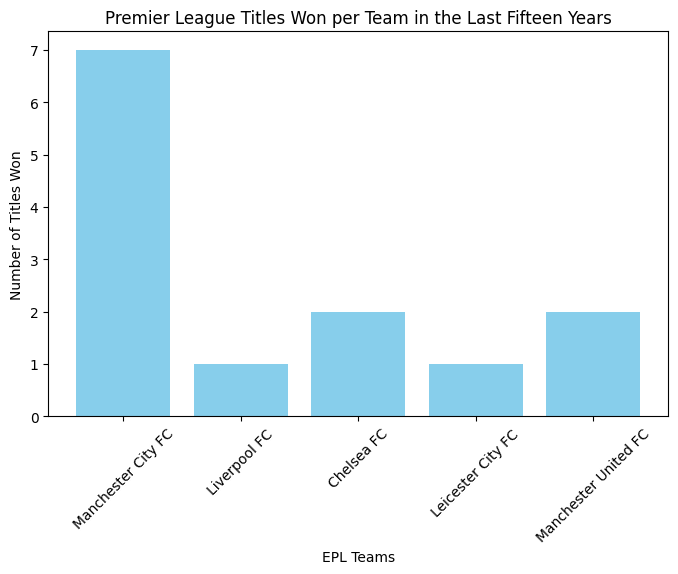

In [9]:
winners:dict = {}

for season in sample_last_fifteen_seasons:
    winner:dict = season.get('winner')
    if winner:
        team_name = winner['name']
        winners[team_name] = winners.get(team_name, 0) + 1
        
teams = list(winners.keys())
wins = list(winners.values())

plt.figure(figsize=(8, 5))
plt.bar(teams, wins, color="skyblue")
plt.xlabel("EPL Teams")
plt.ylabel("Number of Titles Won")
plt.title("Premier League Titles Won per Team in the Last Fifteen Years")
plt.xticks(rotation=45)
plt.show()

In [10]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


Here, w fetch the current premier league standings, use the prettytable library to create a table to show this data, as shown 
in the resultof the execution of the below cell.

In [14]:
from prettytable import PrettyTable

result = fetch_from_endpoint('competitions/PL/standings')
epl_table = result.get('standings', [])[0].get('table', [])

table = PrettyTable(['#', 'Team', 'Pl', 'W', 'D', 'L', 'GD', 'Pts'])

for team in epl_table:
    table.add_row([team['position'], team['team']['name'], team['playedGames'], team['won'],
                   team['draw'], team['lost'], team['goalDifference'],
                   team['points']
                  ])

print(table)

+----+----------------------------+----+----+----+----+-----+-----+
| #  |            Team            | Pl | W  | D  | L  |  GD | Pts |
+----+----------------------------+----+----+----+----+-----+-----+
| 1  |        Liverpool FC        | 29 | 21 | 7  | 1  |  42 |  70 |
| 2  |         Arsenal FC         | 29 | 16 | 10 | 3  |  29 |  58 |
| 3  |    Nottingham Forest FC    | 29 | 16 | 6  | 7  |  14 |  54 |
| 4  |         Chelsea FC         | 29 | 14 | 7  | 8  |  16 |  49 |
| 5  |     Manchester City FC     | 29 | 14 | 6  | 9  |  15 |  48 |
| 6  |    Newcastle United FC     | 28 | 14 | 5  | 9  |  9  |  47 |
| 7  | Brighton & Hove Albion FC  | 29 | 12 | 11 | 6  |  6  |  47 |
| 8  |         Fulham FC          | 29 | 12 | 9  | 8  |  5  |  45 |
| 9  |       Aston Villa FC       | 29 | 12 | 9  | 8  |  -4 |  45 |
| 10 |      AFC Bournemouth       | 29 | 12 | 8  | 9  |  12 |  44 |
| 11 |        Brentford FC        | 29 | 12 | 5  | 12 |  5  |  41 |
| 12 |     Crystal Palace FC      | 28 | 10 | 9 

We fetch the top scorers in the premier league currently, then sample the top five. We then create custom labels based
on the player names, goals scored and the team they are currently a part of. We also then create a pie chart and represent 
the data accordingly for easier visualization.

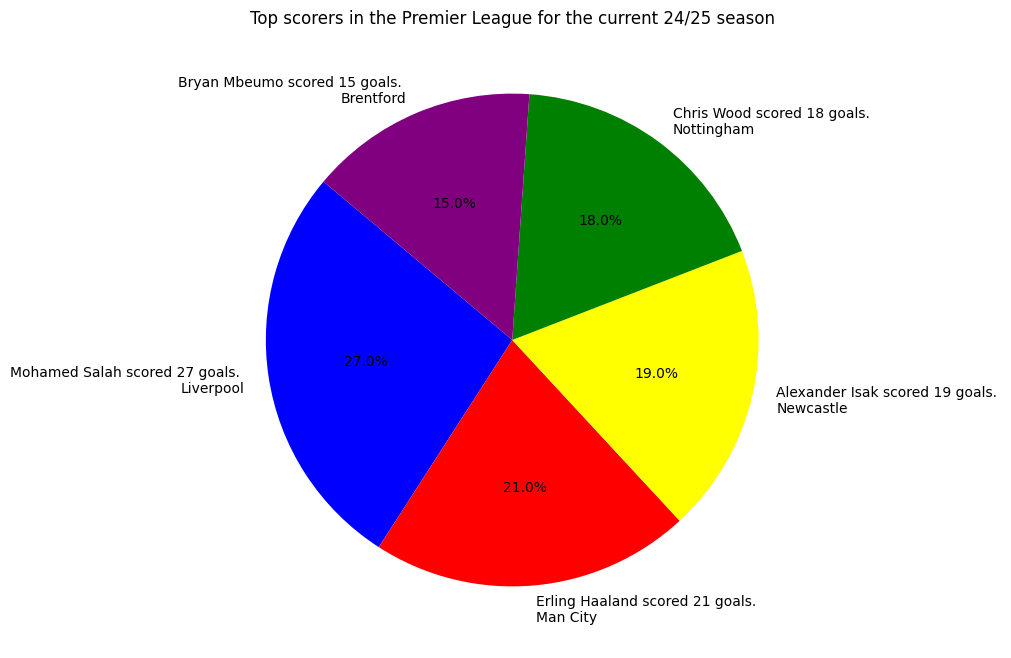

In [16]:
result = fetch_from_endpoint('competitions/PL/scorers')
top_5_scorers=result.get('scorers',[])[:5]

players:list = []
goals:list = []
respective_teams:list = []

for scorer in top_5_scorers:
    players.append(scorer['player']['name'])
    goals.append(scorer['goals'])
    respective_teams.append(scorer['team']['shortName'])

labels = [f"{player} scored {goal} goals. \n{team}" for player, goal, team in zip(players, goals, respective_teams)]
plt.figure(figsize=(8, 8))
plt.pie(goals, labels=labels, autopct="%1.1f%%", startangle=140, colors=["blue", "red", "yellow", "green", "purple"])
plt.title("Top scorers in the Premier League for the current 24/25 season")
plt.show()